**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Train and Evaluate Model](#2-bullet)
3. [Predictions](#3-bullet)

## 1. [Libraries and settings](#1-bullet)

In [439]:
! pip install matplotlib scikit-learn

In [440]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [441]:
filepath = r'/content/drive/MyDrive/VietFinanceLab-Analyzing-Market-Trends-and-Forecasting-Future-Price/Dataset/consumer/LSS.csv'
# Load data into a pandas DataFrame
df = pd.read_csv(filepath, sep = '\t', index_col=0)

# Convert the date column to ordinal values
df['TradingDate'] = pd.to_datetime(df['TradingDate'])
df['TradingDate'] = df['TradingDate'].apply(lambda date: date.toordinal())

In [442]:
df = df.dropna()
# Create a new dataframe
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

In [443]:
# scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.43286332],
       [1.22762535],
       [1.42224756],
       ...,
       [0.5977571 ],
       [0.62960437],
       [0.61545003]])

## 2. [Train and Evaluate Model](#2-bullet)

### Create dataset

In [444]:
# Split the data into features (X) and target (y)
x = df.drop(["Close", "Code"], axis=1)
y = df["Close"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# print(train_test_split)

### Building model

Using best hyperparameters after tuning to retrain model

In [445]:
# Create and train the RFR model
RFR_Model = RandomForestRegressor(n_estimators=100, min_samples_leaf=2) # Added n_estimators and random_state
RFR_Model.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=2)

In [446]:
# Predict the stock prices on the testing set
predictions = RFR_Model.predict(x_test)
predictions = predictions.reshape(-1,1)

predictions_train = RFR_Model.predict(x_train)
predictions_train = predictions_train.reshape(-1,1)

In [447]:
predictions = scaler.inverse_transform(predictions)
predictions_train = scaler.inverse_transform(predictions_train)
# Reshape y_test and y_train to be 2D arrays
y_test = y_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)
# print("y_test: ", y_test)
y_train = scaler.inverse_transform(y_train)
# print("y_train: ", y_train)

In [448]:
column_names_pred = ['Close_predict']
df_predictions = pd.DataFrame(predictions, columns=column_names_pred)

column_names_test = ['Close_test']
df_test = pd.DataFrame(y_test, columns=column_names_test)

concatenated = np.concatenate([df_predictions, df_test], axis=1)
column_names_concat = ['Close_predict', 'Close_test']
df_concatenated = pd.DataFrame(concatenated, columns = column_names_concat)

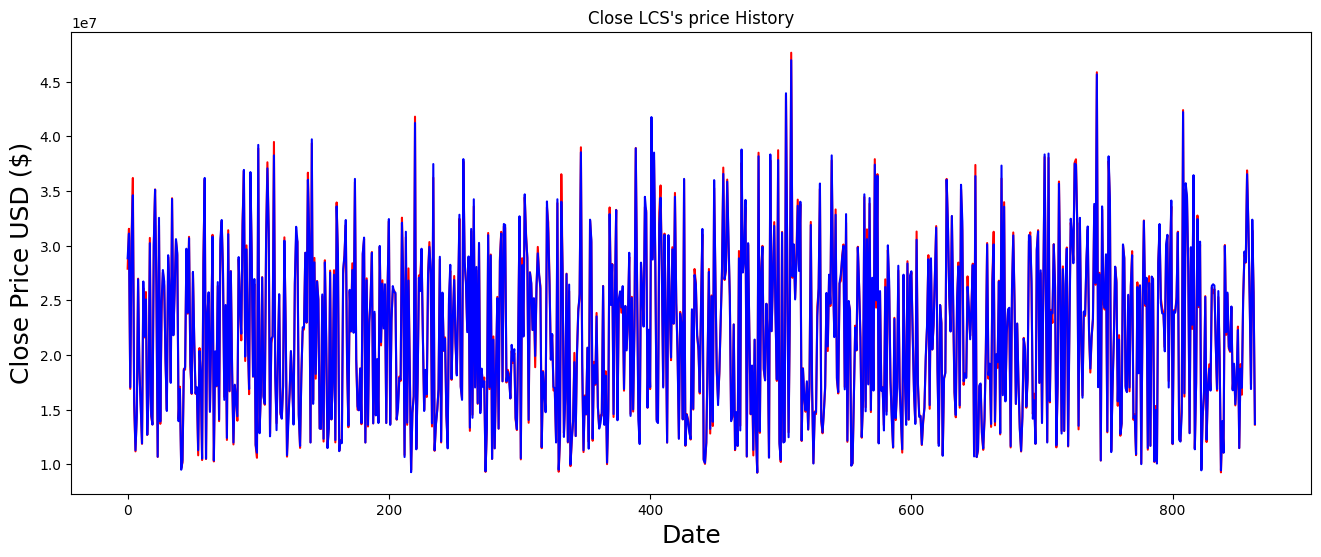

In [449]:
plt.figure(figsize=(16,6))
plt.title('Close LCS\'s price History')
plt.plot(df_predictions['Close_predict'], color='red', label='Predicted Close Price')
plt.plot(df_test['Close_test'], color='blue', label='Actual Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Evaluate model

In [450]:
predictions = scaler.fit_transform(predictions)
predictions_train = scaler.fit_transform(predictions_train)
y_test = scaler.fit_transform(y_test)
y_train = scaler.fit_transform(y_train)

In [451]:
mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print("Train Mean Absolute Error:", mae_train)
print("Train Mean Squared Error:", rmse_train)
print("Train R-squared:", r2_train)

Train Mean Absolute Error: 0.014218603318994055
Train Mean Squared Error: 0.00045096997189447
Train R-squared: 0.9995490300281056


In [452]:
mae_test = mean_absolute_error(y_test, predictions)
rmse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

print("Test Mean Absolute Error:", mae_test)
print("Test Mean Squared Error:", rmse_test)
print("Test R-squared:", r2_test)

Test Mean Absolute Error: 0.03143640938183204
Test Mean Squared Error: 0.0020894626129970987
Test R-squared: 0.9979105373870029


Model Tuning

In [453]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import datetime

# Load dataset
file_path = '/content/drive/MyDrive/VietFinanceLab-Analyzing-Market-Trends-and-Forecasting-Future-Price/Dataset/construction/PTC.csv'
df = pd.read_csv(file_path, sep='\t', index_col=0)

# Preprocess date
df['TradingDate'] = pd.to_datetime(df['TradingDate'])
df['TradingDate'] = df['TradingDate'].apply(lambda d: d.toordinal())

# Drop missing values
df = df.dropna()

# Keep target column
target_column = 'Close'
scaler = StandardScaler()

# Feature/Target split
X = df.drop(['Close', 'Code'], axis=1)
y = df[target_column].values.reshape(-1, 1)  # for inverse_transform later

# Scale target
y_scaled = scaler.fit_transform(y)

# Split data
x_train, x_test, y_train_scaled, y_test_scaled = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# GridSearchCV: Model tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20]
}

rfr = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train_scaled.ravel())

# Best model from tuning
best_rfr = grid_search.best_estimator_

# Predict
pred_test_scaled = best_rfr.predict(x_test).reshape(-1, 1)
pred_train_scaled = best_rfr.predict(x_train).reshape(-1, 1)

# Inverse scaling
y_test = scaler.inverse_transform(y_test_scaled)
y_train = scaler.inverse_transform(y_train_scaled)
pred_test = scaler.inverse_transform(pred_test_scaled)
pred_train = scaler.inverse_transform(pred_train_scaled)

# Create DataFrames for plotting
df_predictions = pd.DataFrame(pred_test, columns=['Close_predict'])
df_actual = pd.DataFrame(y_test, columns=['Close_test'])

# Plot prediction vs actual
plt.figure(figsize=(16, 6))
plt.plot(df_predictions['Close_predict'], color='red', label='Predicted Close Price')
plt.plot(df_actual['Close_test'], color='blue', label='Actual Close Price')
plt.title("Close Price Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

# Print performance metrics
print("Best Parameters:", grid_search.best_params_)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("Test R2 Score:", r2_score(y_test, pred_test))
